In [179]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
test_data = pd.read_csv("./test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [182]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [183]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


train Data의 기본 정보
Age, Cabin(객실 번호), Embarked(정박 항구)에서 결측치

In [184]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Domain Knowledge
1등실 총 329명 A~E 

2등실 총 285명 D~F 

3등실 총 710명 D~G

1등급 null -> A ~ E random  
2등급 null -> D ~ F random  
3등급 null -> D ~ G random  

이걸로봐서 
죽은사람 549중 나이불명 125명 -> 죽은사람 평균나이 30.6261792453
산사람중 342중 나이불명 52명 -> 산사람 평균 나이 28.343689655

죽은사람 549중 객실 불명 481명
산사람  342중 객실 불명 206명

산사람 342중 정박항구 불명 2명
죽은사람 X

## 데이터 시각화해서 각 feature 분석

In [187]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

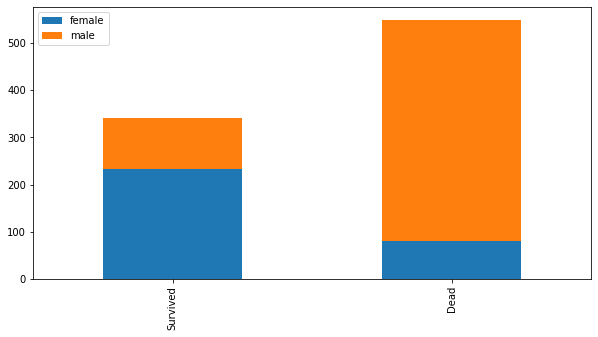

In [188]:
bar_chart('Sex') #남성이 더죽음

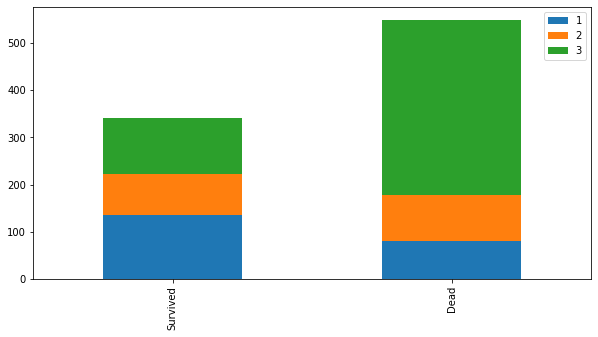

In [189]:
bar_chart('Pclass') # 3등급이 제일 많이 죽음, 1등급이 제일많이 살아남음

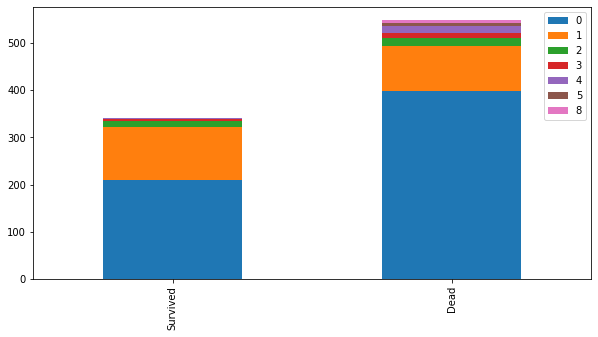

In [190]:
bar_chart('SibSp') #형제 or 배우자가 있는사람이 생존 가능성 더큼.

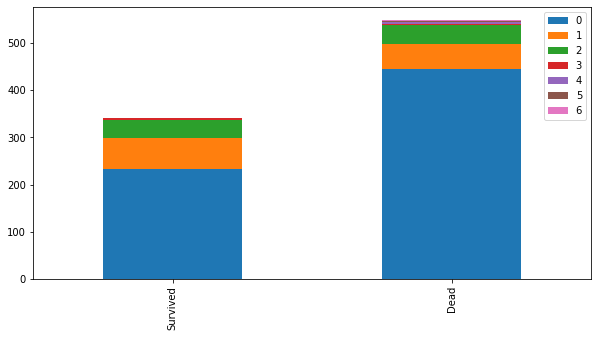

In [191]:
bar_chart('Parch') #혼자보다 부모 or 자식 있는 사람이 생존 가능성 더큼

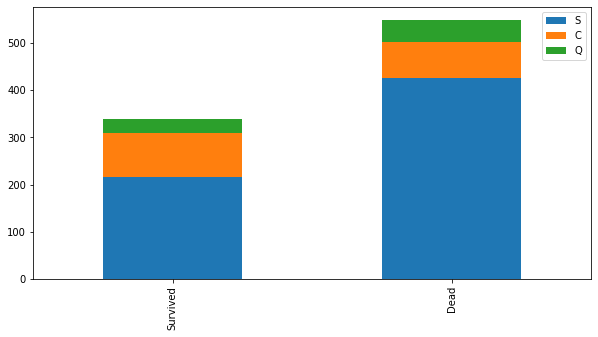

In [192]:
bar_chart('Embarked') #S=Southhampton, C=Cherbourg, Q=Queenstown, C선착장에서 탄사람이 살 확률 더 높다

## 이름 Data preprocessing

이름에서 Mr., Miss., Mrs.만 추출

In [193]:
#전체 Data 결합
Data = [train_data, test_data]
for dataset in Data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [194]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Capt          1
Jonkheer      1
Mme           1
Sir           1
Ms            1
Countess      1
Don           1
Name: Title, dtype: int64

In [195]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

### Title map
Mr : 0  
Miss : 1  
Mrs : 2  
Others : 3  

In [196]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in Data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [197]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


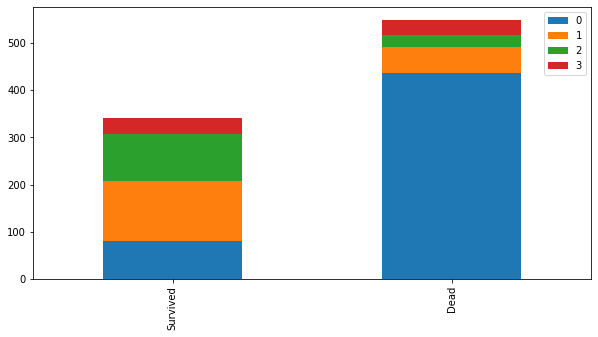

In [198]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('Title')
#"Mr":0, "Miss":1, "Mrs":2

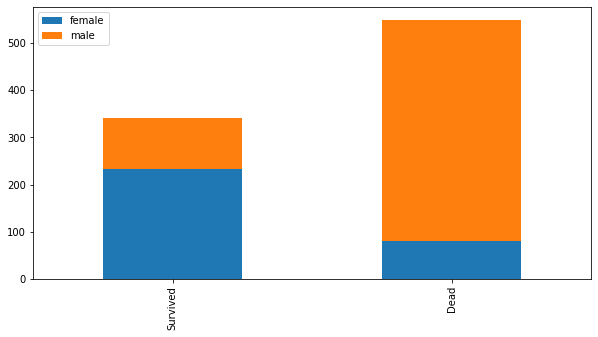

In [199]:
bar_chart('Sex')

0번 Mr.(남성)은 상대적으로 많이 죽었음을 알 수 있다. 반면 1번과 2번 Miss와 Mrs.(여성)은 상대적으로 많이 생존했음을 알 수 있다.
성별(SEX)와 이름('Name')은 종속적인 변수로 볼 수 있으므로 이름 feature 삭제

In [200]:
# 데이터 셋에서 불필요한 feature 삭제
train_data. drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [201]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## 성별
male : 0  
female : 1

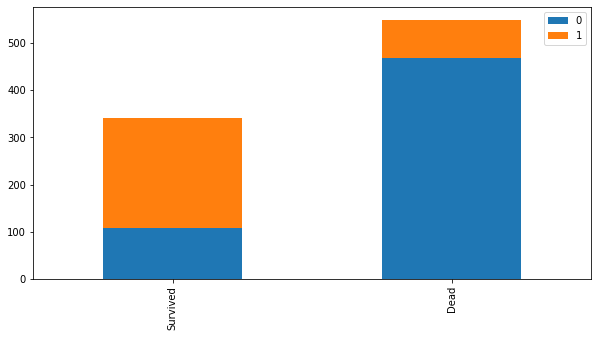

In [202]:
sex_mapping = {"male": 0, "female":1}
for dataset in Data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

## Age
male surviv  
male death  
female survive  
female death  
의 평균과 분산에서 랜덤으로 숫자 뽑아서 집어넣기

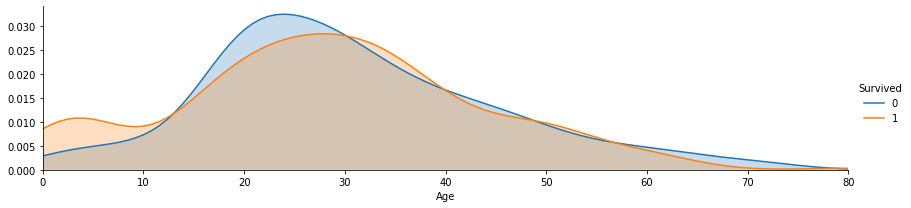

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

In [204]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'), inplace=True)

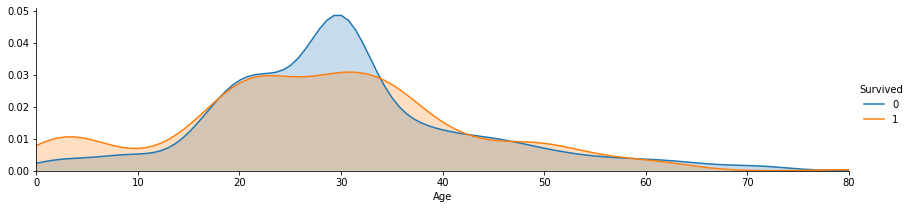

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

## Embarked
도시별 빈곤 비교

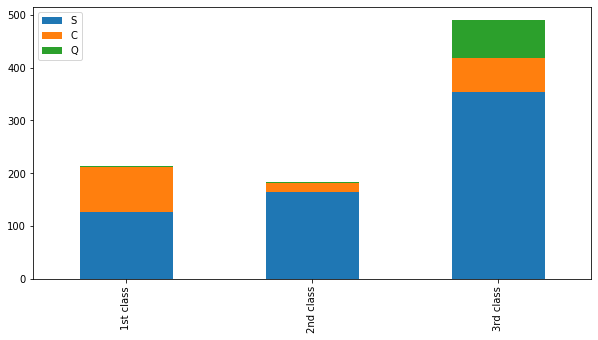

In [206]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

Q 도시에서 탄 사람들은 1등급이 거의 없다. S 도시에서 탑승한 사람들이 대부분을 차지하고 있다. 즉, Embarked 정보가 쓰여있지 않다면 S라고 써도 무방할 것 같다.

In [207]:
for dataset in Data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [208]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


그리고 머신러닝 classifier를 위해 텍스트를 숫자로 바꿔주자.

In [209]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in Data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare
티켓 가격은 클래스과 관련이 높다. 그리고 클래스는 missing value가 존재하지 않았다. 그러므로 각 클래스의 티켓 가격 가운데 값을 티켓 가격의 missing value에 넣어주겠다.

In [210]:
train_data["Fare"].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_data["Fare"].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

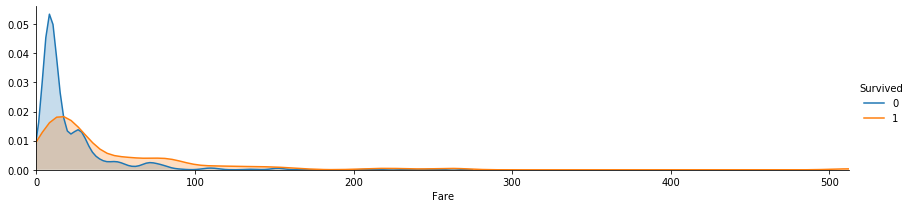

In [211]:
facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()

plt.show()

싼 티켓을 구매한 사람은 사망률이 높고 비싼 티켓을 구매한 사람은 생존률이 높다는 것을 알 수 있다.

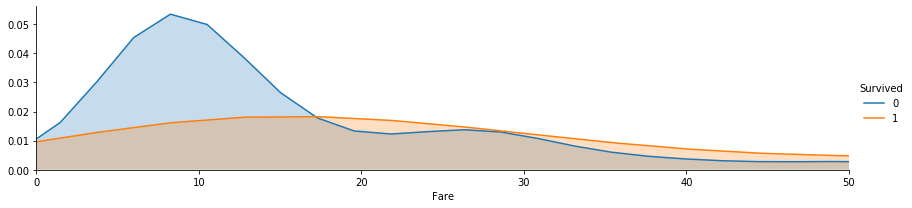

In [212]:
facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0,50)
plt.show()

In [213]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,1,0


## Cabin

In [214]:
train_data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
E101           3
              ..
B30            1
D30            1
B50            1
A10            1
E68            1
Name: Cabin, Length: 147, dtype: int64

알파벳만 남기고 삭제

In [215]:
for dataset in Data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

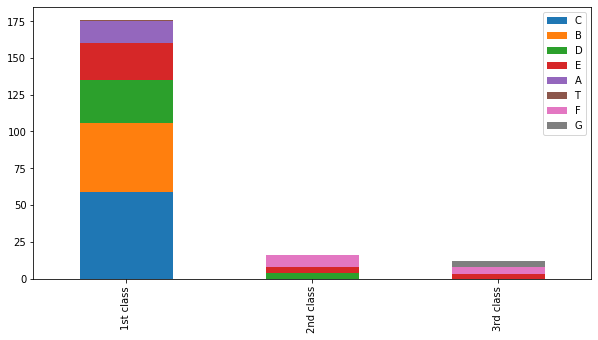

In [216]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

1등급 : ABCDET  
2등급 : DEF  
3등급 : EFG  

In [217]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in Data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

각 등급별로 나누어 매핑

In [218]:
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계가 있기 때문에 각 클래스별 cabin의 중간값을 missing value에 넣어주도록 한다.

In [219]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,1.8,0,3
887,888,1,1,1,19.0,0,0,112053,30.0000,0.4,0,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,2.0,0,1
889,890,1,1,0,26.0,0,0,111369,30.0000,0.8,1,0


In [230]:
features_drop = ['PassengerId', 'Ticket']
train = train_data.drop(features_drop, axis=1)
test = test_data.drop(features_drop, axis=1)

In [231]:
y = train['Survived']
X = train.drop('Survived', axis=1)

In [232]:
X.shape, y.shape

((891, 9), (891,))

In [235]:
test = test.fillna(2)

In [238]:
test.shape

(418, 9)

# 학습
svc, lr, randomforest, nn

In [225]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=1004)

학습전에 default parameter로 4개의 모델을 돌려서 모델이 어떤지(과적합인지, 과소적합인지 확인하여 feature를 제거할지 늘릴지 결정)

## 전처리

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
test = sc.transform(test)

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_sc, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_sc, y_test)))

훈련 세트 정확도: 0.86
테스트 세트 정확도: 0.79


## Feature Selection 진행
분명히 종속적인 feature들이 있을 것이므로 성능저하에 영향을 줄 것으로 예상

In [48]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


svc = SVC()

efs1 = EFS(svc, 
           min_features=1,
           max_features=9,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train_sc, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 511/511

Best accuracy score: 0.85
Best subset (indices): (0, 2, 3, 4, 5, 6, 8)
Best subset (corresponding names): ('0', '2', '3', '4', '5', '6', '8')


성능이 가장 좋은 특성  
'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title'  
제외된 특성  
'Sex', 'Embarked'  
'Sex'와 Title은 분명히 종속적인 관계가 있고, 'Embarked'는 'Fare', 'Pclass', 'Cabin'과 분명히 종속적 관계가 있기 때문에 특성추출된 데이터로 훈련 시작.

In [240]:
X_train_efs = efs1.transform(X_train_sc)
X_test_efs = efs1.transform(X_test_sc)
test_efs = efs1.transform(test)
svc = SVC()
svc.fit(X_train_efs, y_train)
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_efs, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_efs, y_test)))

훈련 세트 정확도: 0.85
테스트 세트 정확도: 0.77


feature 다썼을때  
훈련 세트 정확도: 0.86  
테스트 세트 정확도: 0.79  
feature extraction  
훈련 세트 정확도: 0.85  
테스트 세트 정확도: 0.77  
뭔가 확률이 내려갔지만 종속적인 관계에있는 feature들은 제거되어야하기 때문에 그대로 진행

In [241]:
from itertools import combinations_with_replacement

def make_poly(X) :
    col_list = []
    for cwr in combinations_with_replacement(np.arange(0, X.shape[1]), 2):
        col_list.append(cwr)
    for x in col_list :
        X_ =(X[:, x[0]]*X[:, x[1]]).reshape(X.shape[0], 1)
        X = np.concatenate((X, X_), axis=1)
    return X
        
X_train_poly = make_poly(X_train_efs)
X_test_poly = make_poly(X_test_efs)
test_poly = make_poly(test_efs)

(579, 7) -> (579, 35)의 데이터로 변경  
아주살짝 일반화가 더 된모습을 볼 수 있다.  

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_poly, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train_poly, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test_poly, y_test)))

훈련 세트 정확도: 0.84
테스트 세트 정확도: 0.79


test acc : 0.77 -> 0.79

여기서 PCA를 적용해 차원 추출을 진행  
가장 최적의 feature갯수를 파악하기 위함

In [52]:
from sklearn.decomposition import PCA
pca = PCA() # 
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.fit_transform(X_test_poly)

PCA 2 components 의 시각화

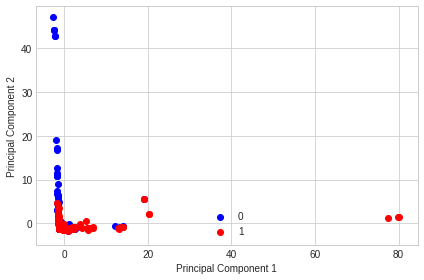

In [53]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1),
                        ('blue', 'red')):
        plt.scatter(X_train_pca[y_train==lab, 0],
                    X_train_pca[y_train==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

component 2개로는 시각적인 구별이 힘들다는것을 파악.

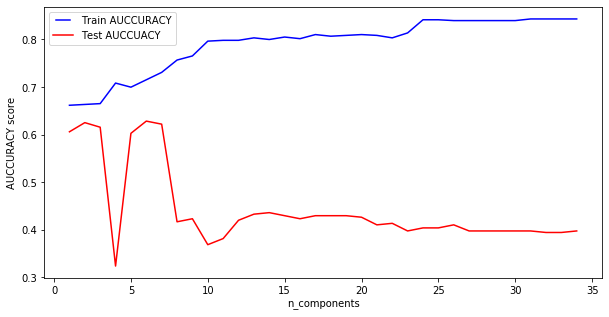

In [54]:
components = np.arange(1, X_train_pca.shape[1], 1)
train_results = []
test_results = []

for i in components:
    svc = SVC()
    svc.fit(X_train_pca[:, :i], y_train)
    aucc = svc.score(X_train_pca[:, :i], y_train)
    train_results.append(aucc) #training accuracy list
    
    aucc = svc.score(X_test_pca[:, :i], y_test)
    test_results.append(aucc)#test accuracy list
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(10, 5))
line1, = plt.plot(components, train_results, 'b', label="Train AUCCURACY")
line2, = plt.plot(components, test_results, 'r', label="Test AUCCUACY")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUCCURACY score')
plt.xlabel('n_components')
plt.show()
#best is 3

각 component별 score인데 대충 100개 이하일때 component에서 비교하면 될꺼같다.

PCA를 썼는데 정확도가 낮아져서 pca쓰지않고 polynomial 상태로 학습 진행하기로 함

## SVC
총 8x8x2(C, gamma, kernel)개의 gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe_svc = Pipeline([('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X_train_poly, y_train)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
svc = SVC(C = 100,
         gamma = 0.001, 
         kernel = 'rbf')
svc.fit(X_train_poly, y_train)
print(svc.score(X_test_poly, y_test))

SCV  
C : 100
gamma : 0.001
kernel : rbf
일때 0.837

하지만 test score 0.766

## logict regression

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
grid={"C":param_range, "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_poly,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hms/anaconda3/lib/pyth

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8358741681790682


/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}  
accuracy : 0.8358741681790682

In [59]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_train_poly,y_train)
print("score",logreg2.score(X_test_poly,y_test))

score 0.7884615384615384


/home/hms/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr : 0.78 test accuracy

## Randomforest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [61]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [62]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
rfc1.fit(X_train_poly, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
from sklearn.metrics import accuracy_score
pred=rfc1.predict(X_test_poly)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7756410256410257


{'criterion': 'entropy',  
 'max_depth': 6,  
 'max_features': 'auto',  
 'n_estimators': 200}  
acc : 0.775

## Neural Network

In [70]:
import seaborn as sns
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid_hair_soul = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

In [73]:
clf_grid.fit(X_train_poly,y_train.values.ravel())
clf_grid_hair_soul.fit(X_train_poly,y_train.values.ravel())

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
print("-----------------Added hair_soul feature--------------")
print("Best score: %0.4f" % clf_grid_hair_soul.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
print("------------------------------------------------------")

-----------------Original Features--------------------
Best score: 0.8273
Using the following parameters:
{'alpha': 0.0001, 'hidden_layer_sizes': 7, 'max_iter': 500, 'random_state': 0, 'solver': 'lbfgs'}
-----------------Added hair_soul feature--------------
Best score: 0.8273
Using the following parameters:
{'alpha': 0.0001, 'hidden_layer_sizes': 7, 'max_iter': 500, 'random_state': 0, 'solver': 'lbfgs'}
------------------------------------------------------


In [74]:
clf = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(7), max_iter=500, random_state=0, solver='lbfgs')
clf.fit(X_train_poly, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [75]:
preds = clf.predict(X_test_poly)

In [76]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7756410256410257


Neural Network score : 0.77564102564102

In [ ]:
pd.concat([testset["id"],sub], axis=1).rename(columns = {0: 'type'}).to_csv("submission_neural_net.csv", index=False)

Submission 제출

In [78]:
submission = pd.read_csv('./gender_submission.csv')

In [79]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [242]:
pred = logreg2.predict(test_poly)
submission = pd.DataFrame({
    "PassengerId" : test_data["PassengerId"],
    "Survived" : pred
    })


In [243]:
submission.to_csv('my_first_sub.csv', index = False)

In [85]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,2.0,2,0.0
1,893,3,1,47.0,1,0,363272,7.0000,2.0,0,2.0
2,894,2,0,62.0,0,0,240276,9.6875,2.0,2,0.0
3,895,3,0,27.0,0,0,315154,8.6625,2.0,0,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,2.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,28.5,0,0,A.5. 3236,8.0500,2.0,0,0.0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,0.8,1,NaN
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2.0,0,0.0
416,1308,3,0,28.5,0,0,359309,8.0500,2.0,0,0.0
